In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-term-deposit-predictions/train.csv
/kaggle/input/bank-term-deposit-predictions/test.csv


In [2]:
#IMPORTING THR LIBRARIES
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import xgboost as xgb

from catboost import CatBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
df_train = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv')

In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
#check the NA counts
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#Check for Duplicate Values, drop if any

#check duplicate values
df_train.duplicated().sum()

0

In [9]:
df_train.shape


(45211, 17)

In [10]:

#Checking the number of unique values
df_train.select_dtypes(include='int64').nunique()

age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

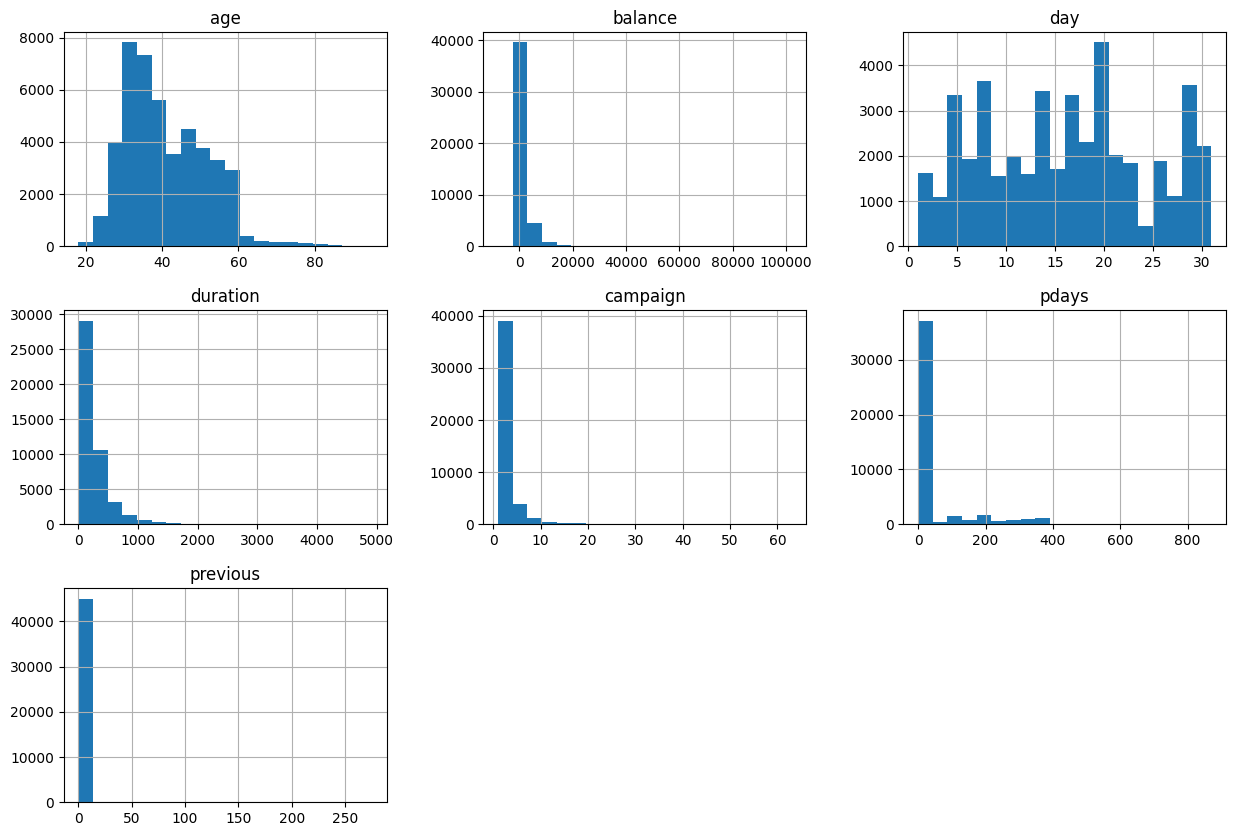

In [11]:
#DATA VISUALIZATION
numeric_columns = df_train.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

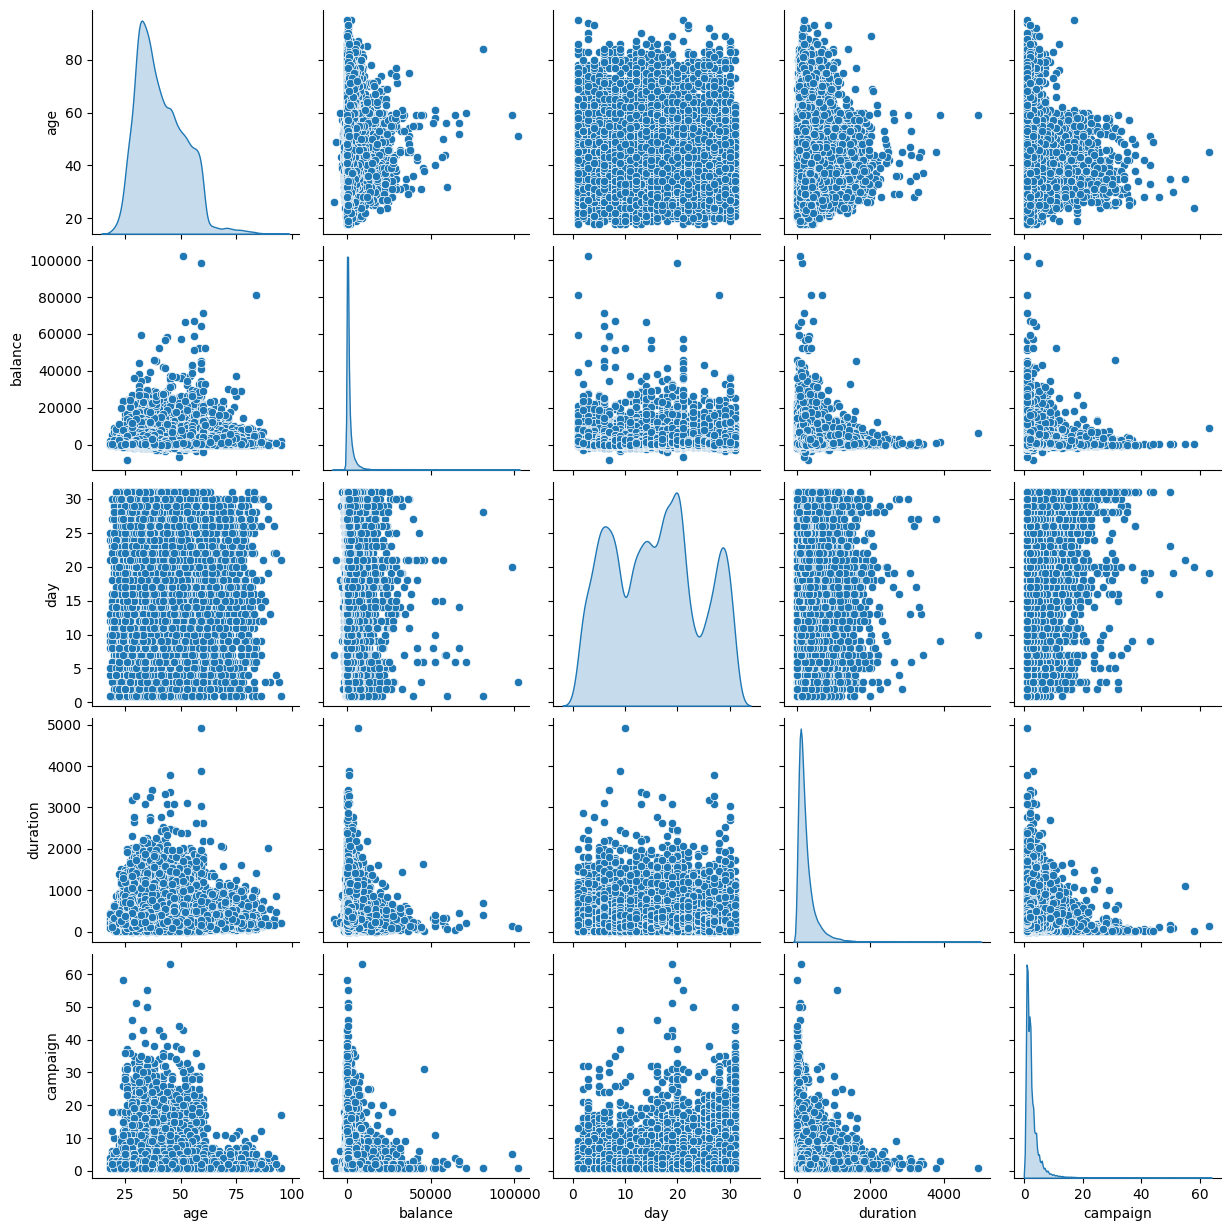

In [12]:
sns.pairplot(df_train[['age', 'balance', 'day', 'duration', 'campaign']], diag_kind='kde')
plt.show()

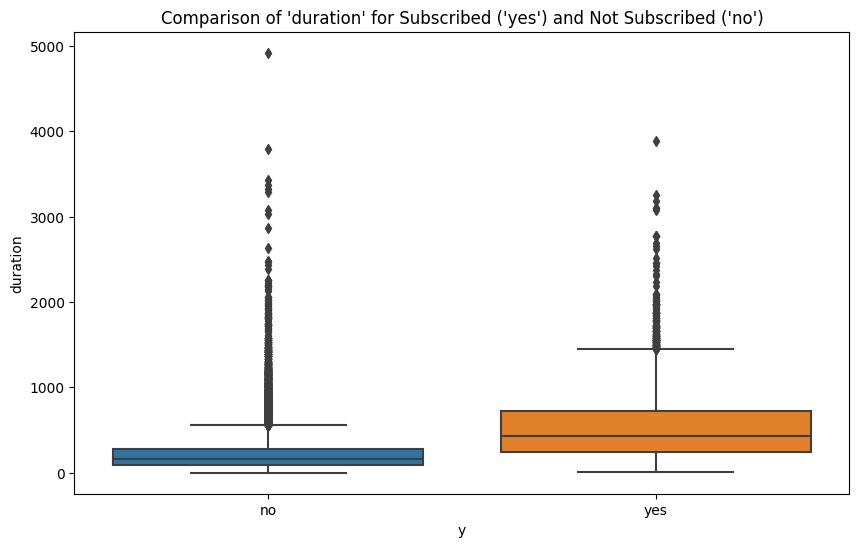

In [13]:
# Compare 'duration' for subscribed ('yes') and not subscribed ('no')
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df_train)
plt.title("Comparison of 'duration' for Subscribed ('yes') and Not Subscribed ('no')")
plt.show()

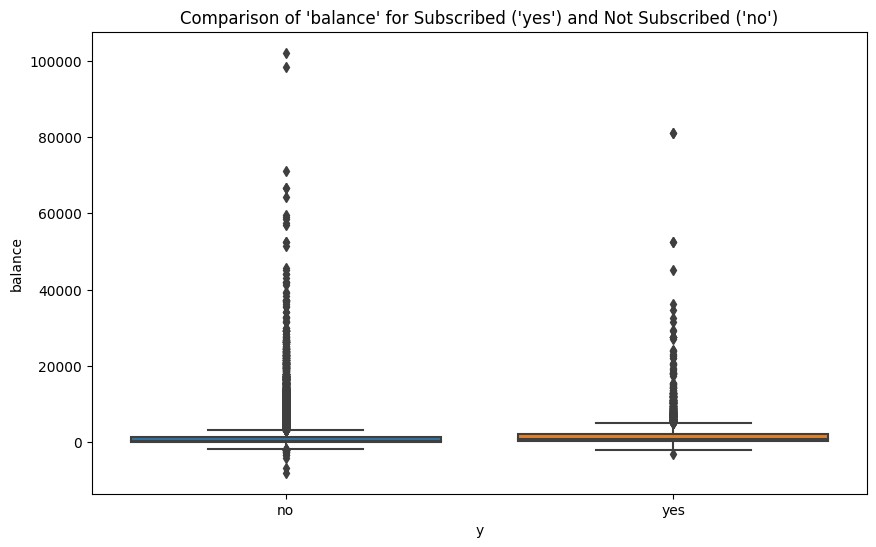

In [14]:
# Compare 'balance' for subscribed ('yes') and not subscribed ('no')
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=df_train)
plt.title("Comparison of 'balance' for Subscribed ('yes') and Not Subscribed ('no')")
plt.show()

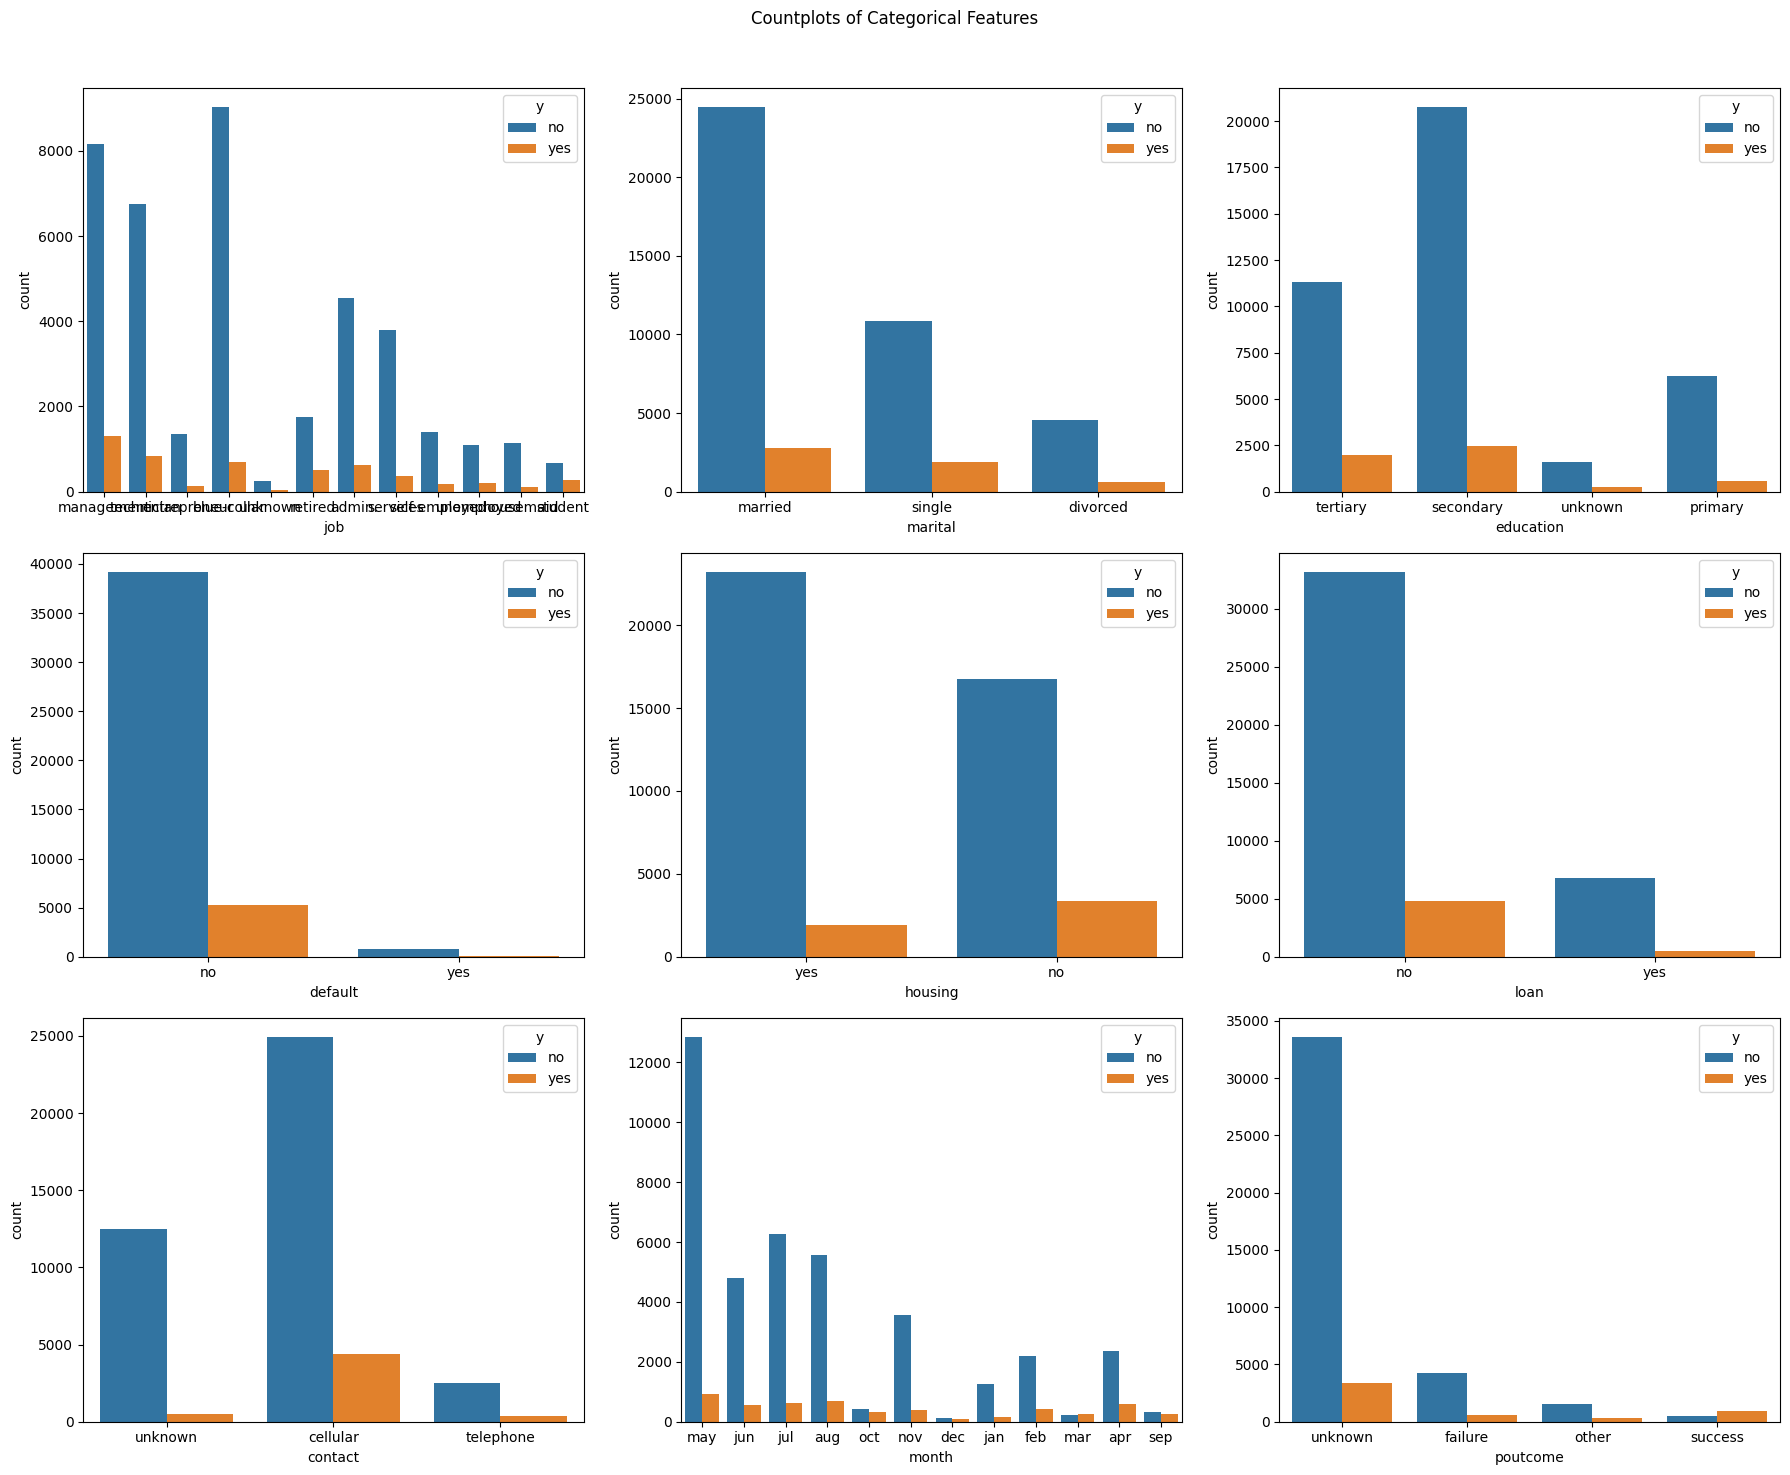

In [15]:
# Countplot for categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Countplots of Categorical Features")

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='y', data=df_train, ax=axes[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

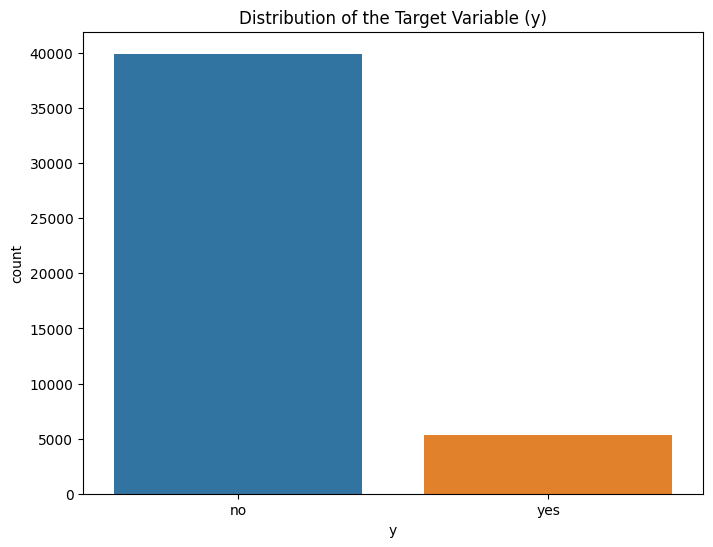

In [16]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df_train)
plt.title('Distribution of the Target Variable (y)')
plt.show()


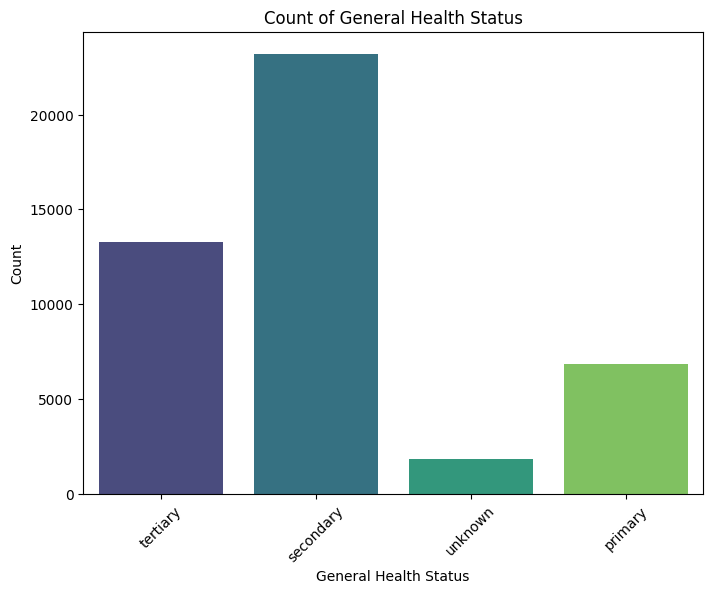

In [17]:
#Count plot for Education
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='education', palette='viridis')
plt.title('Count of General Health Status')
plt.xlabel('General Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

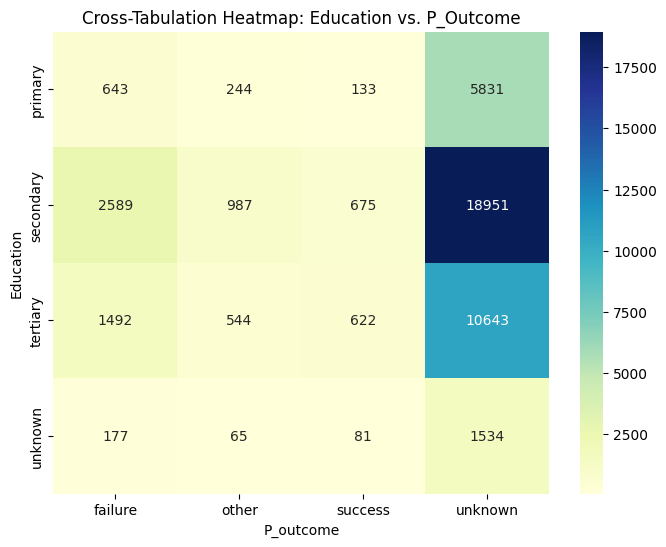

In [18]:

crosstab = pd.crosstab(df_train['education'], df_train['poutcome'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: Education vs. P_Outcome')
plt.xlabel('P_outcome')
plt.ylabel('Education')
plt.show()

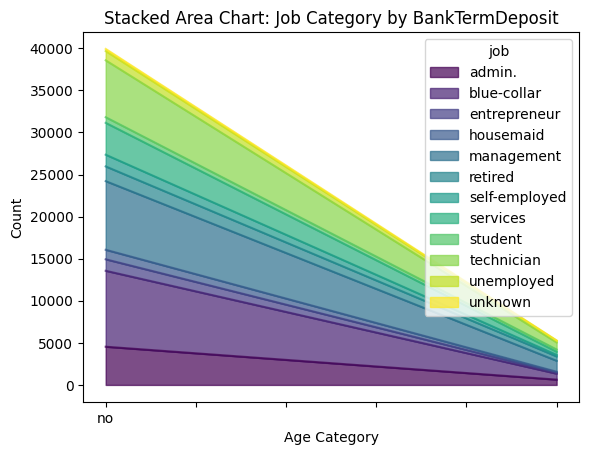

In [19]:
#Stacked Area Chart: Job Category by BankTermDeposit
crosstab = pd.crosstab(df_train['y'], df_train['job'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Job Category by BankTermDeposit')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [20]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df_train.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [21]:
#Checking the number of unique values
df_encoded.select_dtypes(include='int64').nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

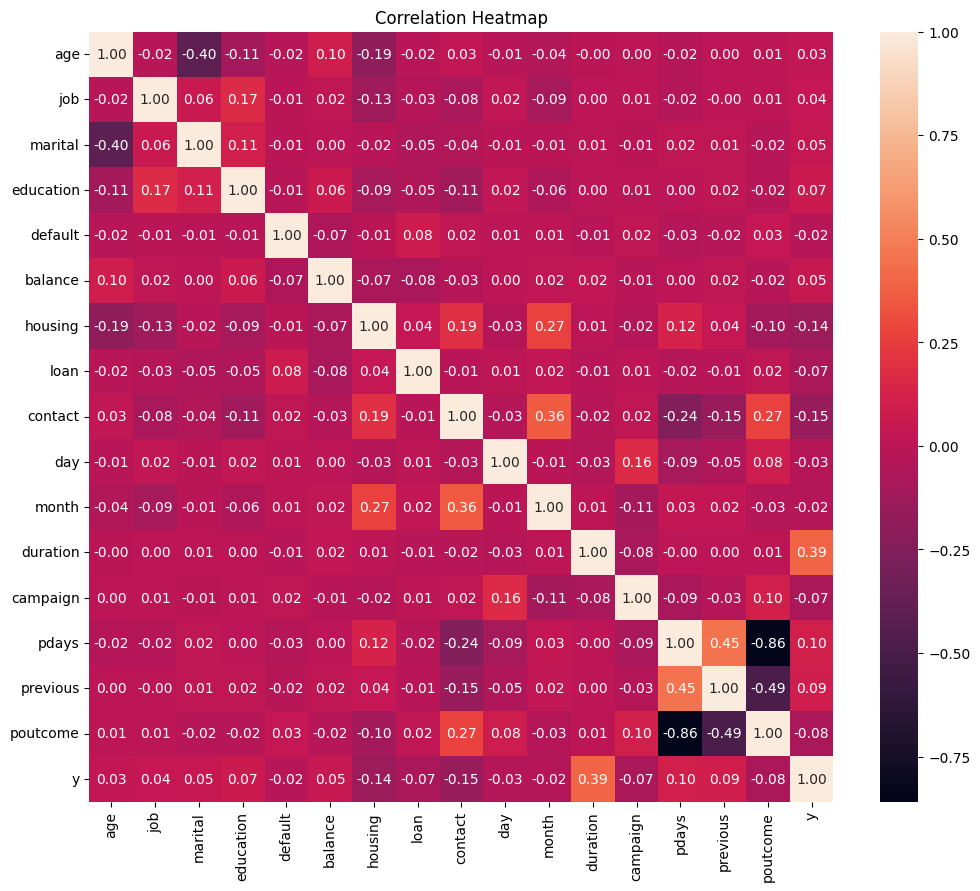

In [22]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [23]:
# Set the correlation threshold for feature removal
correlation_threshold = 0.05

# Filter columns with correlation below the threshold with 'y'
low_corr_features = df_encoded.columns[abs(df_encoded.corr()['y']) < correlation_threshold]

# Display the features to be removed
print("Features to be removed:", low_corr_features)

# Drop the low-correlation features
df_train_filtered = df_encoded.drop(low_corr_features, axis=1)

# Display the updated dataframe
print("\nDataFrame after feature removal:")
print(df_train_filtered.head())

Features to be removed: Index(['age', 'job', 'marital', 'default', 'day', 'month'], dtype='object')

DataFrame after feature removal:
   education  balance  housing  loan  contact  duration  campaign  pdays  \
0          2     2143        1     0        2       261         1     -1   
1          1       29        1     0        2       151         1     -1   
2          1        2        1     1        2        76         1     -1   
3          3     1506        1     0        2        92         1     -1   
4          3        1        0     0        2       198         1     -1   

   previous  poutcome  y  
0         0         3  0  
1         0         3  0  
2         0         3  0  
3         0         3  0  
4         0         3  0  


In [24]:
selected_columns = ['education','balance','housing','loan','contact','duration','campaign',
                   'pdays','previous','poutcome','y']

# Create the new DataFrame with only the selected columns
df_selected = df_encoded[selected_columns]

# Split the data into training and testing sets
X = df_selected.drop(columns=['y'])  # Features
y = df_selected['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36168, 10)
X_test shape: (9043, 10)
y_train shape: (36168,)
y_test shape: (9043,)


In [25]:
#MODEL FITTING AND PREDICTION
selected_columns = ['education','balance','housing','loan','contact','duration','campaign',
                   'pdays','previous','poutcome','y']

# Create the new DataFrame with only the selected columns
df_selected = df_encoded[selected_columns]

# Split the data into training and testing sets
X = df_selected.drop(columns=['y'])  # Features
y = df_selected['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36168, 10)
X_test shape: (9043, 10)
y_train shape: (36168,)
y_test shape: (9043,)


In [26]:
#Check Class Imbalance
from imblearn.over_sampling import SMOTE
import numpy as np

# Check class distribution
class_distribution = y_train.value_counts()
print("Class Distribution:")
print(class_distribution)

# Check the imbalance ratio (ratio of the majority class to the minority class)
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("Imbalance Ratio:", imbalance_ratio)

# If the imbalance ratio is greater than a threshold (e.g., 2), apply SMOTE
threshold = 2
if imbalance_ratio > threshold:
    # Initialize SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Fit and apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check the class distribution after SMOTE
    resampled_class_distribution = y_train_resampled.value_counts()
    print("\nClass Distribution After SMOTE:")
    print(resampled_class_distribution)

    # Update the training data with the resampled data
    X_train = X_train_resampled
    y_train = y_train_resampled
    print("\nSMOTE Applied. Training data resampled.")
else:
    print("\nNo significant class imbalance. SMOTE not applied.")




Class Distribution:
y
0    31970
1     4198
Name: count, dtype: int64
Imbalance Ratio: 7.615531205335874

Class Distribution After SMOTE:
y
0    31970
1    31970
Name: count, dtype: int64

SMOTE Applied. Training data resampled.


In [27]:
#REMOVE OUTLIER WITH IQR
# Define the columns to remove outliers
selected_columns = ['education','balance','housing','loan','contact','duration','campaign',
                   'pdays','previous','poutcome']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")


Number of rows removed due to outliers: 38925


In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

Linear Regression Mean Squared Error: 0.32
Linear Regression Mean Absolute Error: 0.44


In [29]:
#LOGISTIC REGRESSION
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.67
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      7952
           1       0.25      0.84      0.38      1091

    accuracy                           0.67      9043
   macro avg       0.61      0.75      0.58      9043
weighted avg       0.88      0.67      0.73      9043



In [30]:
#KNN

# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.673227911091452
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78      7952
           1       0.22      0.70      0.34      1091

    accuracy                           0.67      9043
   macro avg       0.58      0.68      0.56      9043
weighted avg       0.86      0.67      0.73      9043



In [31]:
#DECISION TREE CLASSIFIER
# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Accuracy: 0.7579343138339046
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      7952
           1       0.27      0.58      0.37      1091

    accuracy                           0.76      9043
   macro avg       0.60      0.68      0.61      9043
weighted avg       0.85      0.76      0.79      9043



In [32]:
#RANDOM FOREST CLASSIFIER
# Create the Random Forest Classifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
#param_grid = {
#    'n_estimators': [50, 100, 200],  
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#}

# Create the GridSearchCV object
#grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
#grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
#best_params = grid_search.best_params_
#best_estimator = grid_search.best_estimator_

#print("Best Parameters:", best_params)

# Fit the RandomForestClassifier with the best parameters using the training data
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_split=10,
                                       n_estimators=200, random_state=42)
rf_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.7579343138339046
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      7952
           1       0.27      0.58      0.37      1091

    accuracy                           0.76      9043
   macro avg       0.60      0.68      0.61      9043
weighted avg       0.85      0.76      0.79      9043



In [33]:
#XGBOOST CLASSIFIER
# Create the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Model Accuracy: 0.7678867632422869
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      7952
           1       0.30      0.69      0.42      1091

    accuracy                           0.77      9043
   macro avg       0.62      0.73      0.64      9043
weighted avg       0.87      0.77      0.80      9043



In [34]:
#CATBOOST CLASSIFIER
# Create the CatBoost Classifier
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent')

# Define the parameter grid for GridSearchCV
param_grid = {
    'iterations': [50, 100, 200],  # You can add more values to test
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(catboost_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.2, 'subsample': 1.0}
Model Accuracy: 0.7704301669799846
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86      7952
           1       0.31      0.74      0.44      1091

    accuracy                           0.77      9043
   macro avg       0.63      0.76      0.65      9043
weighted avg       0.88      0.77      0.81      9043



In [35]:
# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # You can add more values to test
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_gb.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

print("Best Parameters (Gradient Boosting):", best_params_gb)

# Predict on the test set using the best estimator
y_pred_gb = best_estimator_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Model Accuracy (Gradient Boosting):", accuracy_gb)
print("Classification Report (Gradient Boosting):\n", report_gb)

Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Model Accuracy (Gradient Boosting): 0.778723874820303
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      7952
           1       0.30      0.61      0.40      1091

    accuracy                           0.78      9043
   macro avg       0.62      0.71      0.63      9043
weighted avg       0.86      0.78      0.81      9043



In [36]:
# Create the LightGBM Classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_lgbm = GridSearchCV(lgbm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_lgbm.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params_lgbm = grid_search_lgbm.best_params_
best_estimator_lgbm = grid_search_lgbm.best_estimator_

print("Best Parameters (LightGBM):", best_params_lgbm)

# Predict on the test set using the best estimator
y_pred_lgbm = best_estimator_lgbm.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

print("Model Accuracy (LightGBM):", accuracy_lgbm)
print("Classification Report (LightGBM):\n", report_lgbm)

Best Parameters (LightGBM): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Model Accuracy (LightGBM): 0.7580448966051089
Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      7952
           1       0.29      0.70      0.41      1091

    accuracy                           0.76      9043
   macro avg       0.62      0.73      0.63      9043
weighted avg       0.87      0.76      0.80      9043



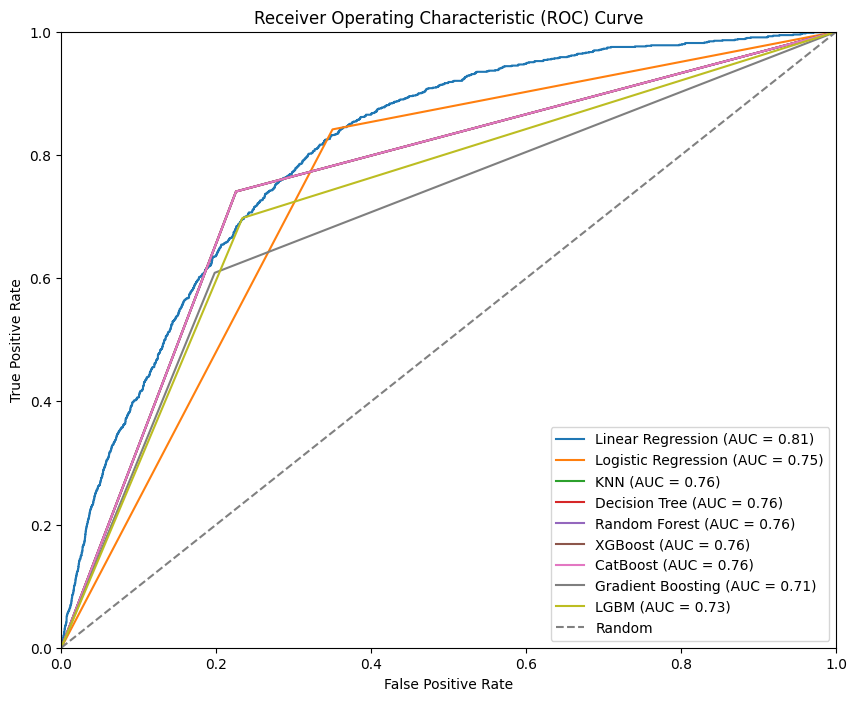

In [37]:
#AUC REPORT
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the classifiers and their predictions
classifiers = ['Linear Regression', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'Gradient Boosting', 'LGBM']
predictions = [lr_predictions, logistic_predictions, y_pred, y_pred, y_pred, y_pred, y_pred, y_pred_gb, y_pred_lgbm]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for i in range(len(classifiers)):
    fpr, tpr, _ = roc_curve(y_test, predictions[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [38]:
#LOAD THE DATA SET

df_test = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')

In [39]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [41]:
selected_columns = ['education','balance','housing','loan','contact','duration','campaign',
                   'pdays','previous','poutcome']
df_test_selected = df_test[selected_columns]

In [42]:
df_test_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   education  4521 non-null   object
 1   balance    4521 non-null   int64 
 2   housing    4521 non-null   object
 3   loan       4521 non-null   object
 4   contact    4521 non-null   object
 5   duration   4521 non-null   int64 
 6   campaign   4521 non-null   int64 
 7   pdays      4521 non-null   int64 
 8   previous   4521 non-null   int64 
 9   poutcome   4521 non-null   object
dtypes: int64(5), object(5)
memory usage: 353.3+ KB


In [43]:
import pandas as pd
from xgboost import XGBClassifier

# Assuming you already have the best parameters and the trained model
best_params = {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

# Create the XGBoost Classifier with the best parameters
best_estimator = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=42
)

# Fit the model on your training data
best_estimator.fit(X_train_clean, y_train_clean)

# Create a copy of the DataFrame to avoid modifying the original
df_test_encoded = df_test.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_test_encoded.select_dtypes(include='object'):
    df_test_encoded[column] = label_encoder.fit_transform(df_test_encoded[column])

selected_columns = ['education','balance','housing','loan','contact','duration','campaign',
                   'pdays','previous','poutcome']
df_test_selected = df_test_encoded[selected_columns]

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(df_test_selected)

# Print the predictions
print("Predictions on the test dataset:")
print(y_pred)

Predictions on the test dataset:
[0 1 0 ... 0 0 0]


In [44]:
# Create a DataFrame to display actual and predicted values side by side
results_df = pd.DataFrame({'Actual': df_test['y'], 'Predicted': y_pred})

# Print the DataFrame


In [45]:
#TEST THE ACCURACY
from sklearn.metrics import accuracy_score

# Since the 'y' column is binary (yes or no)
# Convert 'yes' to 1 and 'no' to 0 for both Actual and Predicted columns
results_df['Actual'] = results_df['Actual'].map({'no': 0, 'yes': 1})
results_df['Predicted'] = results_df['Predicted'].astype(int)

# Calculate accuracy
accuracy = accuracy_score(results_df['Actual'], results_df['Predicted'])

# Print accuracy
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7934085379340854
